In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [9]:
#Collecting X and Y
X = data['TV'].values
X.shape

(200,)

In [10]:
Y = data['sales'].values
Y.shape

(200,)

In [12]:
#calculating the coefficient.Mean X and Y
mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)

147.0425
14.0225


In [15]:
#Total number of values
n = len(X)
#using the formula to calculate b1 and b0  y = b1x + b0
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_x) * (Y[i]-mean_y)
    denom += (X[i]-mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 *mean_x)
print(b1)
print(b0)

0.04753664043301969
7.032593549127704


In [18]:
print("The linear model is :Y = {:.5} + {:.4}X".format(b0,b1))

The linear model is :Y = 7.0326 + 0.04754X


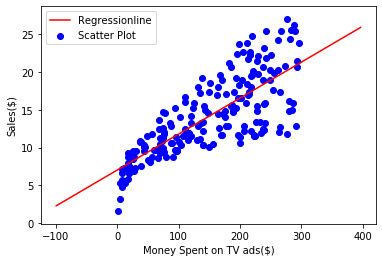

In [20]:
#plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) -100

#calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = b0 + b1*x

#ploting line
plt.plot(x,y,color = 'red',label='Regressionline')
#Plotting scatter points
plt.scatter(X,Y,c = 'Blue',label = 'Scatter Plot')
plt.xlabel('Money Spent on TV ads($)')
plt.ylabel('Sales($)')
plt.legend(loc ='best')
plt.show()

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

The Formula for R-Squared is : R^2 = 1-Explained Variation/Total Variation.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%.An R-squared of 100% means that all movements of a security (or other dependent variable) are completely explained by movements in the index (or the independent variable(s) 

In [31]:
y_pred = b0 + b1*X[2]
print(y_pred)
#calcualting R^2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_tot += (Y[i]-mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

7.8502237645756425
R2 Score
0.6118750508500708


In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
#Collecting the data
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(reg.coef_[0][0])
print(reg.intercept_[0])
print("The linear model is :Y = {:.5} + {:.4}X".format(reg.intercept_[0],reg.coef_[0][0]))

0.047536640433019764
7.032593549127693
The linear model is :Y = 7.0326 + 0.04754X


In [39]:
predictions = reg.predict(X)

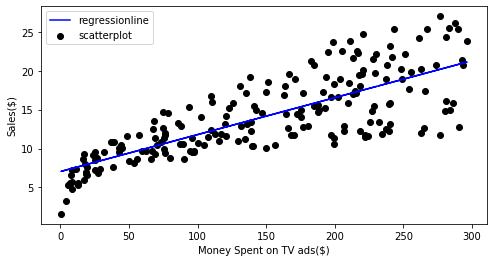

In [40]:
plt.figure(figsize = (8,4))
plt.scatter(data['TV'],data['sales'],c = 'black',label = 'scatterplot')
plt.plot(data['TV'],predictions,c = 'blue',label = 'regressionline')
plt.xlabel("Money Spent on TV ads($)")
plt.ylabel('Sales($)')
plt.legend(loc ='best')
plt.show()

In [42]:
#r2 score
r2 = reg.score(X,y)
print("R2 score:",r2)

R2 score: 0.611875050850071


In [45]:
predictions = reg.predict([[17.2]])
predictions

array([[7.85022376]])

What if your data is actually more complex than a simple straight line? Surprisingly you can actually use a linear model to fit non-linear data.A simple way to do this is to add powers of each feature as new features,then train a linear model on this extended  set of features.This technique is called "Polynomial Regression"

In [46]:
#Lets look the following example
m = 150
X = 6*np.random.rand(m,1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [49]:
X.shape

(150, 1)

In [50]:
y.shape

(150, 1)

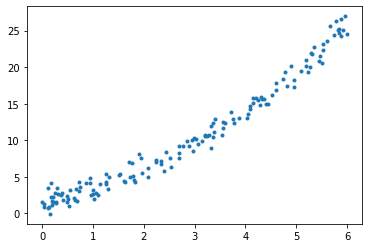

In [52]:
plt.plot(X,y,'.')

Clearly,a st.line will never fit this data properly,so let's use Scikit-learn's PolynomialFeatures class to transform our training data by adding the square(2nd-degree polynomial) of each feature in the training set as new feature.

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)

degree:integer
The degree of the polynomial features. Default = 2.

include_bias:boolean
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [57]:
X_poly = poly_features.fit_transform(X)

In [58]:
X[0]

array([0.25720171])

In [59]:
X_poly[0]

array([0.25720171, 0.06615272])

X_poly contains the original feature of X plus the square of this feature,now we can fit a LinearRegression model to this extended training data

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [65]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_   #0.5*X**2 + X + 2

(array([1.650335]), array([[1.25518966, 0.46189946]]))

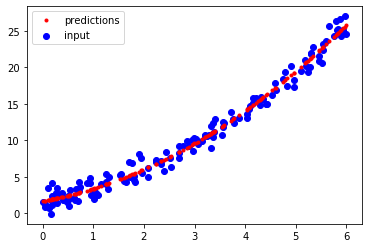

In [67]:
plt.scatter(X,y,color = 'blue',label = 'input')
plt.plot(X,lin_reg.predict(X_poly),'.',color = 'r',label = 'predictions')
plt.legend(loc = 'best')
plt.show()

Polynomial Regression model is the extension of the simple linear model by adding the extra predictors obtained by raising(squaring) each of the original predictors to a power. 

In [68]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [79]:
#collecting the data
X = data.iloc[:,0:3].values
y = data.iloc[:,3:].values

In [80]:
y.shape

(200, 1)

In [81]:
X.shape

(200, 3)

In [83]:
lin = LinearRegression()
lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
#Fitting the Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(lin.coef_)
print(lin.intercept_)

[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [87]:
lin.score(X,y)

0.8972106381789521

In [88]:
a = lin2.predict(poly.fit_transform([[230.1,37.8,69.2]]))
a

array([[21.71890829]])